# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<br/>
<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

<br/>
<br/>

<center><i><b>
Atenção: não são autorizadas cópias, divulgações ou qualquer tipo de uso deste material sem o consentimento prévio dos autores.
</center></i></b>

# <center>Exercício - Agrupamento usando o método $k$-médias</center>

Neste exercício, você implementará o método $k$-médias e verá como ele agrupa os dados. 

Antes de começar, é recomendável que você revise os conceitos apresentados em aula.

## Instruções
Este arquivo contém o código que auxiliará no desenvolvimento do exercício. Você precisará completar as seguintes funções:

* <tt>findClosestCentroids()</tt>
* <tt>calculateCentroids()</tt>
* <tt>calculateCost()</tt>

## Parte 1: Encontrando os centróides mais próximos

Nessa etapa, deverá ser criada uma função para encontrar os centróides mais próximos.

Primeiro, vamos carregar os dados do arquivo.

In [135]:
# -*- coding: utf-8 -*-

# Caminho dos arquivos
FILES_DIRECTORY = "dados"

import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes e análise de dados
import os #importa a biblioteca para tarefas relacionadas ao sistema operacional

if __name__ == '__main__':
    import matplotlib.pyplot as plt # biblioteca usada para gerar os gráficos
    
    # importa o arquivo e guarda em um dataframe do Pandas
    df_dataset = pd.read_csv( os.path.join(FILES_DIRECTORY, 'data.csv'), sep=',') 

Vamos dar uma olhada nas 6 primeiras amostras da base de dados.

In [136]:
if __name__ == '__main__':
    # vamos usar a função display para imprimir o dataframe. 
    # Também poderíamos ter usado a função print: print(df_dataset.head(n=6))
    display(df_dataset.head(n=6))

,f1,f2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
5,1.247923,4.932678


Conforme você pode observar, a base de dados que acabamos de carregar não possui rótulos. Por isso, nós utilizaremos o $k$-médias, um método de aprendizado não supervisionado, para tentar encontrar agrupamentos nos dados.

Vamos guardar os dados dentro de uma matriz. Depois, vamos exibir as 5 primeiras linhas da matriz de dados.

In [137]:
if __name__ == '__main__':
    # pega os valores do dataframe
    X = df_dataset.values 

    # imprime as 5 primeiras linhas da matriz X
    print('X:', X[0:5,:])

X: [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]


Vamos criar uma função para plotar os dados.

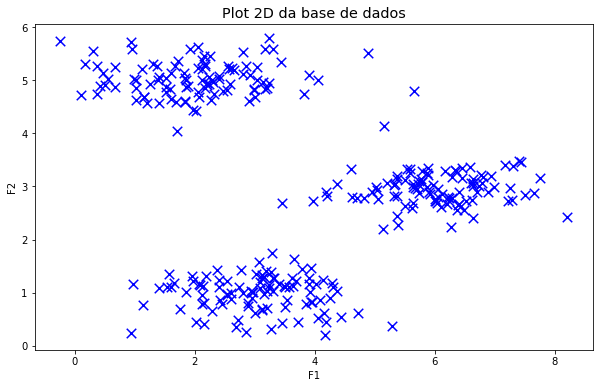

In [138]:
# função para plotar os dados
def visualizarDados(X,Y):
    """
    Função usada para plotar os dados
    """
    
    # definindo o tamanho da figura 
    plt.figure(figsize=(10,6))
    
    # plota os dados
    plt.scatter( X, Y, marker='x', label = 'Dados', color='blue', s=90) 
    
    # define os nomes do eixo x e do eixo y
    plt.xlabel(r'F1',fontsize='medium') 
    plt.ylabel(r'F2',fontsize='medium') 

    #define o título do gráfico
    plt.title('Plot 2D da base de dados', fontsize='x-large')
    
if __name__ == '__main__':
    # chamando a função que plota os dados   
    visualizarDados(X[:,0],X[:,1])
    plt.show()

Agora, você precisa completar a função <tt>findClosestCentroids()</tt>.

Dado um conjunto de $k$ centróides, a função <tt>findClosestCentroids()</tt> será usada para encontrar quais dos centróides estão mais próximos de cada uma das amostras da base de dados. Para isso, para cada amostra, você deve calcular a distância Euclidiana entre ela e cada um dos centróides. Depois, basta selecionar o centróide com a menor distância como representante da amostra. 

Essa função irá retornar um vetor com $m$ elementos, onde $m$ é a quantidade de amostras na base de dados. A posição $i$ desse vetor, deve conter o índice do centróide mais próximo à amostra $i$. Ela também deve retornar um vetor com a distância de cada amostra para o centroide mais próximo dela.    

**Observações**

* A distância Euclidiana é calculada usando a seguinte equação: $dist(x,y) = \sqrt{\sum_{i=1}^{n} (x_i-y_i)^2}$, onde $x$ e $y$ são vetores que possuem a mesma dimensão ($n$).

* no Python, para calcular o quadrado dos valores de um vetor A, basta usar ```A**2```.
* no Python, para calcular o raiz quadrada dos valores de um vetor A, basta usar ```np.sqrt(A)```.
* no Python, a função `np.min()` retorna o valor mínimo de um vetor e a função `np.argmin()` retorna o índice do valor mínimo de um vetor.

In [139]:
def findClosestCentroids(X, centroids):
    """
    Calcula o centróide mais próximo de cada um dos exemplos 
    
    Parâmetros:
    -----------
    X: é uma matriz, onde cada linha representa um exemplo do problema avaliado
    
    centroids: é uma matriz, onde cada linha representa um centróide
    
    Saída:        
    dist: um vetor que contem a distancia entre cada objeto e o centróide mais próximo
    
    idx: um vetor que contém o índice do centróide mais próximo de cada objeto
    """
    
    n = X.shape[0] # quantidade de amostras
    
    # inicializa o valor de K
    K = centroids.shape[0];

    # você deverá retornar as seguintes variáveis corretamente    
    dist = np.zeros( X.shape[0] ) # guarda a distancia de cada amostra para seu centroide 
    idx = np.zeros( X.shape[0], dtype=int ) # guarda os indices dos centroides de cada amostra

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instruções: para cada exemplo, encontre o centróide mais próximo a ele e
    #             guarde o índice desse centróide na variável idx, na posição apropriada.
    #             Basicamente, idx[i] deve conter o índice do centróide mais
    #             próximo do exemplo i. Portanto, o valor a ser guardado deve 
    #             estar no intervalo 1..K, onde K é o número de centróides.
    #
    # Obs: você pode usar um laço for, percorrendo cada exemplo para completar a tarefa.

    for i in range(n):
        distancias = np.zeros(K)
        for k in range(K):
            distancias[k] = np.linalg.norm(X[i] - centroids[k])
        
        dist[i] = np.min(distancias)
        idx[i] = np.argmin(distancias)

        

    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    ##########################################################################
            
    return dist, idx



if __name__ == '__main__':
    # define uma quantidade de centróides
    K = 3

    # criar os k centróides iniciais
    initial_centroids = np.array( [[3,3],[6,2],[8,5]] )

    dist, idx = findClosestCentroids(X, initial_centroids)

    print('Os centróides mais próximos às 4 primeiras amostras da base de dados:')
    print(idx[0:4]);
    print('\nOs centróides mais próximos às 4 primeiras amostras deveriam ser: \n[0, 2, 1, 0]\n');

Os centróides mais próximos às 4 primeiras amostras da base de dados:
[0 2 1 0]

Os centróides mais próximos às 4 primeiras amostras deveriam ser: 
[0, 2, 1, 0]



## Parte 2: Calculando as médias

Depois de ter implementado a função para encontrar os centróides mais próximos, você precisa completar a função <tt>calculateCentroids()</tt>. 

A função <tt>calculateCentroids()</tt> irá retornar novos centróides com base na média dos dados pertencentes a cada um dos centróides atuais. 

In [140]:
def calculateCentroids(X, idx, K):
    """
    Retorna os novos centróides calculando a média das amostras de cada 
    centróide atual. 
    
    Esta função deve retornar uma matriz de centroides, onde cada linha
    representa um centróide, assim como um vetor contendo a quantidade de 
    amostras associadas a cada centroide
    
    Parâmetros:
      X   - é a base de dados, onde cada linha representa uma amostra.
      idx - é um vetor onde cada elemento possui valor entre [0..K]. O elemento
            de índice $i$ representa o índice do centróide mais próximo a i.
      K   - o número de centróides
            
    Saída:        
      centroids: uma matriz em que cada linha corresponde a um centróide
    
      num_samples: um vetor de tamanho K contendo a quantidade de amostras para cada centróide
    """
    
    # varíaveis úteis
    m, n = X.shape # quantidade de amostras e número de atributos

    # você precisa retornar as seguintes variaveis corretamente
    centroids = np.zeros( [K, n] )
    num_samples = np.zeros(K)
    
    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Intruções: para cada centróide, calcule as médias de todas as amostras
    #            que pertencem a ele. Portanto, a linha i da matriz de
    #            centroides (centroides[i, :]) deve conter a média dos dados
    #            pertencentes ao centróide i.
    #
    # Dica: você pode usar um laço de repetição percorrendo cada exemplo ou cada centróide 
    #        para calcular os novos centroides.

    for i in range(K):
        centroids[i] = np.mean(X[i == idx], axis=0)
        num_samples[i] = np.sum(idx == i)

        


    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    ##########################################################################

    return centroids, num_samples

if __name__ == '__main__':
    # chama a função
    centroids, num_samples = calculateCentroids(X, idx, K)

    print('Novos centróides calculados a partir dos K centróides iniciais')
    print(centroids);
    print('Quantidade de amostras por centróide')
    print(num_samples)

    print('\nOs centróides deveriam ser:');
    print('[ 2.42830111 3.15792418 ]');
    print('[ 5.81350331 2.63365645 ]');
    print('[ 7.11938687 3.6166844  ]\n');

Novos centróides calculados a partir dos K centróides iniciais
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
Quantidade de amostras por centróide
[191. 103.   6.]

Os centróides deveriam ser:
[ 2.42830111 3.15792418 ]
[ 5.81350331 2.63365645 ]
[ 7.11938687 3.6166844  ]



## Parte 3: Agrupamento usando o $k$-Médias

Após ter implementado as funções <tt>calculateCentroids</tt> e <tt>findClosestCentroids</tt>, você possui todas as ferramentas necessárias para executar o método $k$-médias.

Primeiro, vamos definir algumas configurações importantes.

In [141]:
if __name__ == '__main__':
    # Parâmetros do K-médias <<< VOCÊ PODE ALTERAR ESSES VALORES >>>

    K = 3 # quantidade de centróides

    max_iters = 10 # máximo de iterações que serão executadas

    # Para facilitar, vamos criar manualmente os centróides 
    # iniciais. Porém, na prática, os centróides iniciais devem ser
    # gerados automaticamente. Uma das formas de fazer isso é 
    # escolhendo aleatoriamente K amostras para serem os 
    # K centróides iniciais.
    initial_centroids = np.array( [[3,3],[6,2],[8,5]] )

Agora, podemos rodar o $k$-Médias.

In [142]:
def executa_kmedias(X, initial_centroids, max_iters, saveHistory = False):
    '''
    Roda o método K-médias sobre a base de dados X, onde cada linha de X
    é uma amostra.
    
    Esta função deve retornar os centróides encontrados na última iteração.
    Ela deve retornar também o vetor idx, onde cada elemento possui valor 
    entre [0..K]. O elemento de índice $i$ representa o índice do centróide
    mais próximo do dado i.
    
    Parâmetros:
       X                 - é a base de dados, onde cada linha representa uma amostra.
       initial_centroids - é uma matriz de centróides, onde cada linha representa
                           um centróide.
       max_iters         - é o máximo de iterações para o método               
    '''

    #  inicializa alguns parâmetros
    
    m, n = X.shape # m é o número de amostras, n é o número de atributos
    
    # inicializa K com o número de centróides que é igual ao 
    # ao número de linhas da matriz initial_centroids
    K = initial_centroids.shape[0]
    
    centroids = initial_centroids # inicializa a matriz de centroides
    previous_centroids = centroids  # inicializa a matriz que vai guardar os centroides
    
    # inicializa o vetor que irá guardar o índice do centróide mais próximo de cada amostra.
    idx = np.zeros( m ) 
    
    if saveHistory:
        # inicializa uma variável do tipo lista que irá guardar a matriz de centróides 
        # e o vetor de índices dos centróides mais próximos obtidos em cada interação
        history = [] 
    
    #  executa o K-médias
    for i in range(max_iters):
        
        # imprime o número da iteração atual
        print('K-Médias - Iteração %d/%d' %(i+1, max_iters));
    
        # para cada amostra de X, encontra o centróide mais próximo
        dist, idx = findClosestCentroids(X, centroids)

        if saveHistory:
            # salva o histórico
            history.append({'centroids': centroids, 'idx': idx})
            
        # dada a lista de centróides mais próximos de cada amostra
        # calcula o novo centroide.
        centroids, num_samples = calculateCentroids(X, idx, K);
        
    # encontre o centroide final mais proximo de cada amostra
    dist, idx = findClosestCentroids(X, centroids)
    
    if saveHistory:
        return centroids, idx, dist, history
    else:
        return centroids, idx, dist

if __name__ == '__main__':    
    centroids, idx, dist, history = executa_kmedias(X, initial_centroids, max_iters, saveHistory = True)
    print('\nK-médias finalizado.\n\n')

K-Médias - Iteração 1/10
K-Médias - Iteração 2/10
K-Médias - Iteração 3/10
K-Médias - Iteração 4/10
K-Médias - Iteração 5/10
K-Médias - Iteração 6/10
K-Médias - Iteração 7/10
K-Médias - Iteração 8/10
K-Médias - Iteração 9/10
K-Médias - Iteração 10/10

K-médias finalizado.




Vamos plotar os centróides obtidos em cada iteração do K-médias.

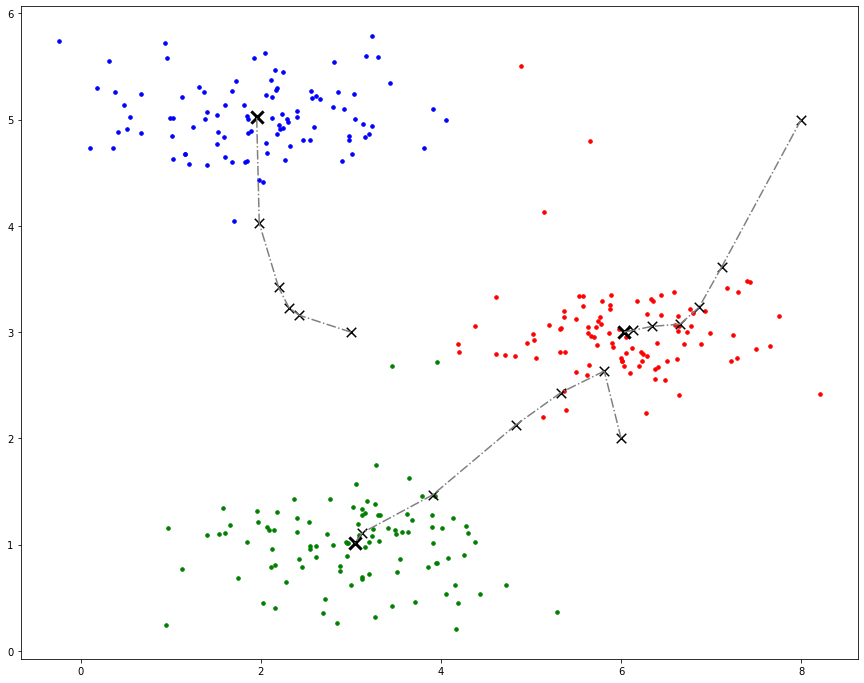

In [143]:
#criando a função para plotar os dados
def visualizarDados_centroids(X, centroids, idx, history):
    
    #definindo o tamanho da figura 
    plt.figure(figsize=(15,12))
    
    lcolors = ['b', 'g', 'r', 'c', 'm', 'y', 'w']
    
    for i in range( centroids.shape[0] ):
        
        # plota os dados
        plt.scatter( X[idx==i,0], X[idx==i,1], marker='.', label = 'Dados', color=lcolors[i], s=50) 
   
    for j in range( len(history) ):
        
        for i in range( centroids.shape[0] ):
            
            if j==len(history)-1:
                # plota o centroide final 
                plt.scatter( history[j]['centroids'][i,0], history[j]['centroids'][i,1], marker='x', color='black', s=150, lw = 3) 
            else:
                plt.scatter( history[j]['centroids'][i,0], history[j]['centroids'][i,1], marker='x', color='black', s=90) 

            if j>0:
                # plota uma linha ligando os centroides
                plt.plot( [history[j-1]['centroids'][i,0], history[j]['centroids'][i,0]], [history[j-1]['centroids'][i,1], history[j]['centroids'][i,1]], color='gray', linestyle='-.')  
        
    plt.show()
    
if __name__ == '__main__':   
    # chama a função que plota os dados   
    visualizarDados_centroids(X, initial_centroids, idx, history)

Por fim, você deve calcular o custo. O custo do agrupamento obtido pelo K-médias pode ser calculado pela média da soma do quadrado das distâncias de cada ponto para o seu centróide, o que pode ser representado pela seguinte equação: $$J = \frac{1}{m} \sum_{i=1}^{m} \Vert x^{(i)} - \mu_{c^{(i)}} \|^2 $$

In [144]:
def calculateCost(dist):
    """
    Calcula o custo do agrupamento obtido
    
    Parâmetro:
    -----------
    dist: um vetor que contem a distancia entre cada objeto e o centróide mais próximo
    
    Saída:
    custo: é o valor do custo do agrupamento
    """
    
    m = len(dist) # numero de amostras

    # voce precisara retornar o valor da variavel custo
    cost = 0 
    
    ########################## COMPLETE O CÓDIGO AQUI  ########################

    cost = np.sum(dist**2)
    cost = cost/m


    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    ##########################################################################
    
    return cost

if __name__ == '__main__':
    cost = calculateCost(dist)

    print('Custo retornado pela funcao: %1.3f' %(cost))

    print('\nCusto esperado: 0.889')

Custo retornado pela funcao: 0.889

Custo esperado: 0.889


Para ver o efeito da mudança nos agrupamentos dado o número de centróides, vamos testar diferentes valores para $K$. 

Quando usamos o K-médias, é importante inicializar os centróides aleatoriamente. Portanto, vamos usar uma função que gere essa versão inicial dos centróides. Depois disso, vamos executar o método K-médias passando os centróides inicializados aleatoriamente como argumento.

In [145]:
def kMeansInitCentroids(X, K):
    """
    Esta função inicializa K centróides para serem usados 
    pelo método K-Médias na base de dados X
    
    Parâmetros:
       X - matriz que representa a base de dados, onde cada linha é uma amostra 
       K - número de centróides desejados
    """
    
    # gera um vetor com os índices das amostras embaralhados
    idx_perm = np.random.permutation( range(X.shape[0]) )
    
    idx_perm = idx_perm[0:K] # pega apenas os primeiros K índices
    
    # inicializa os centroides usando os primeiros K índices 
    # embaralhados das amostras
    centroids = X[idx_perm,:]
    
    return centroids

Agora, vamos testar o K-médias para diferentes valores de $k$. 


K = 1

K-Médias - Iteração 1/10
K-Médias - Iteração 2/10
K-Médias - Iteração 3/10
K-Médias - Iteração 4/10
K-Médias - Iteração 5/10
K-Médias - Iteração 6/10
K-Médias - Iteração 7/10
K-Médias - Iteração 8/10
K-Médias - Iteração 9/10
K-Médias - Iteração 10/10

Custo para k=1: 6.526



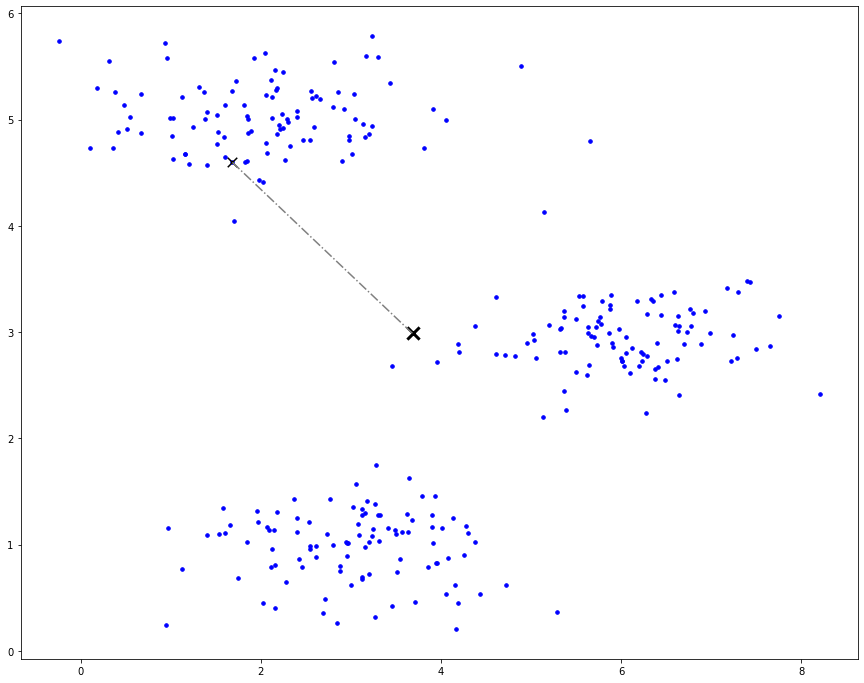


K = 2

K-Médias - Iteração 1/10
K-Médias - Iteração 2/10
K-Médias - Iteração 3/10
K-Médias - Iteração 4/10
K-Médias - Iteração 5/10
K-Médias - Iteração 6/10
K-Médias - Iteração 7/10
K-Médias - Iteração 8/10
K-Médias - Iteração 9/10
K-Médias - Iteração 10/10

Custo para k=2: 3.044



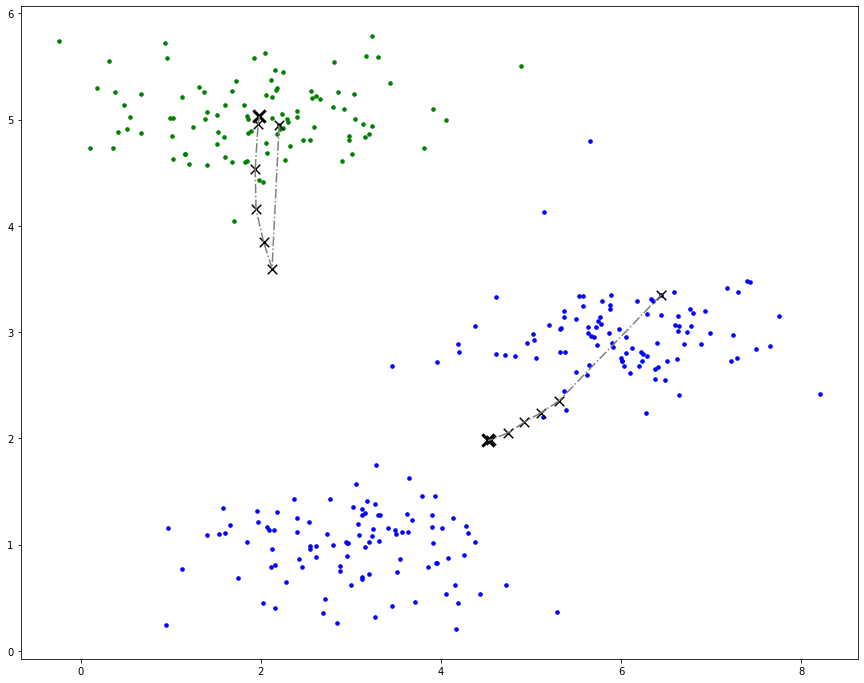


K = 3

K-Médias - Iteração 1/10
K-Médias - Iteração 2/10
K-Médias - Iteração 3/10
K-Médias - Iteração 4/10
K-Médias - Iteração 5/10
K-Médias - Iteração 6/10
K-Médias - Iteração 7/10
K-Médias - Iteração 8/10
K-Médias - Iteração 9/10
K-Médias - Iteração 10/10

Custo para k=3: 0.889



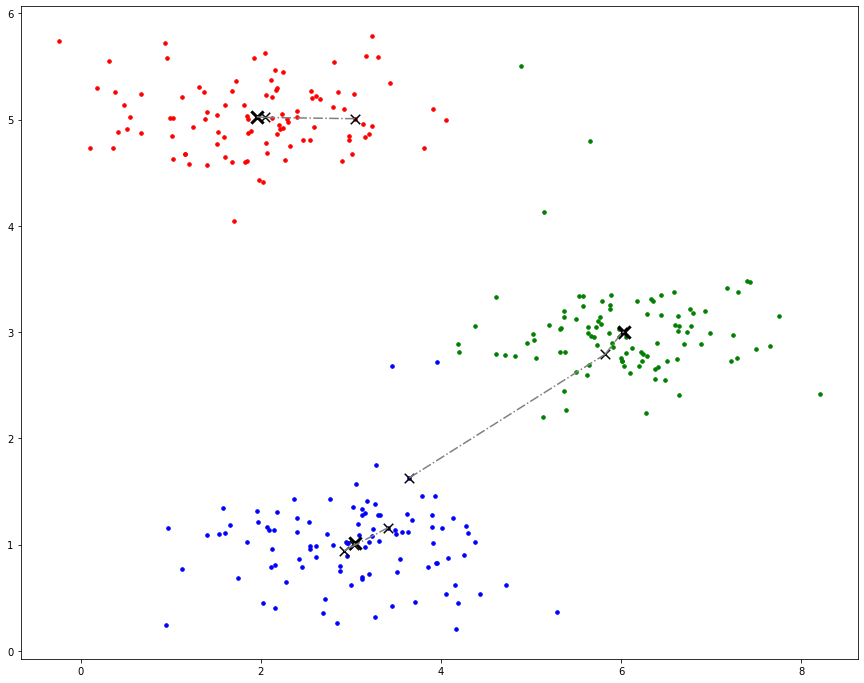


K = 4

K-Médias - Iteração 1/10
K-Médias - Iteração 2/10
K-Médias - Iteração 3/10
K-Médias - Iteração 4/10
K-Médias - Iteração 5/10
K-Médias - Iteração 6/10
K-Médias - Iteração 7/10
K-Médias - Iteração 8/10
K-Médias - Iteração 9/10
K-Médias - Iteração 10/10

Custo para k=4: 0.705



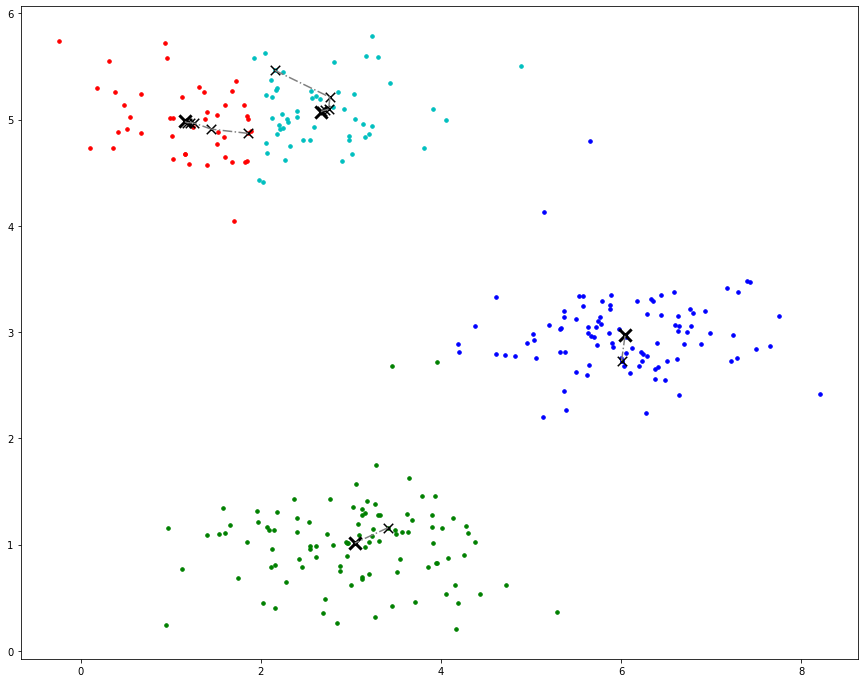


K = 5

K-Médias - Iteração 1/10
K-Médias - Iteração 2/10
K-Médias - Iteração 3/10
K-Médias - Iteração 4/10
K-Médias - Iteração 5/10
K-Médias - Iteração 6/10
K-Médias - Iteração 7/10
K-Médias - Iteração 8/10
K-Médias - Iteração 9/10
K-Médias - Iteração 10/10

Custo para k=5: 0.538



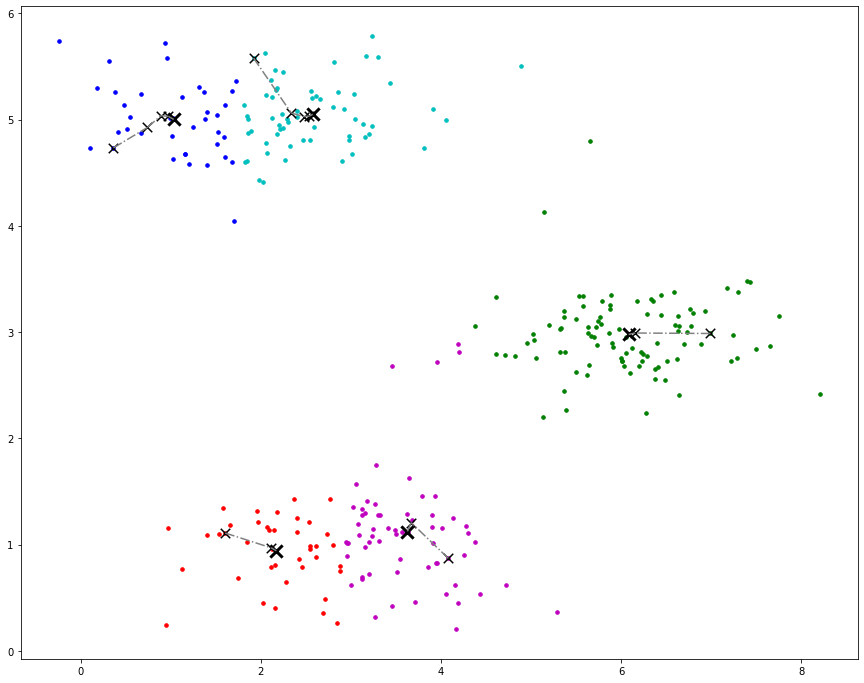


K = 6

K-Médias - Iteração 1/10
K-Médias - Iteração 2/10
K-Médias - Iteração 3/10
K-Médias - Iteração 4/10
K-Médias - Iteração 5/10
K-Médias - Iteração 6/10
K-Médias - Iteração 7/10
K-Médias - Iteração 8/10
K-Médias - Iteração 9/10
K-Médias - Iteração 10/10

Custo para k=6: 0.403



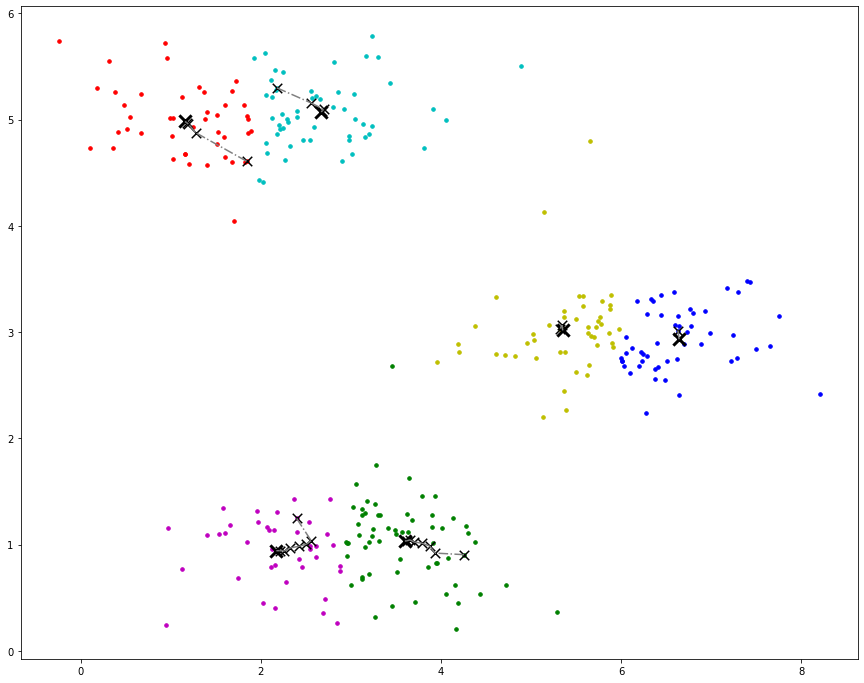

In [146]:
if __name__ == '__main__':
    # valores de k que serao avaliados
    valores_k = np.array( [1,2,3,4,5,6] )

    # inicializa os custos
    custos = np.zeros( len(valores_k) )

    for i, k in enumerate(valores_k):

        print('\n%s\nK = %d\n%s\n' %(20*'=',i+1,20*'=') )

        # inicializa os centroides aleatoriamente
        initial_centroids = kMeansInitCentroids(X, k)

        max_iters = 10

        centroids, idx, dist, history = executa_kmedias(X, initial_centroids, max_iters, saveHistory = True)

        custos[i] = calculateCost(dist)

        print('\nCusto para k=%d: %1.3f\n' %(k, custos[i]))

        visualizarDados_centroids(X, initial_centroids, idx, history)

Vamos plotar os custos. 

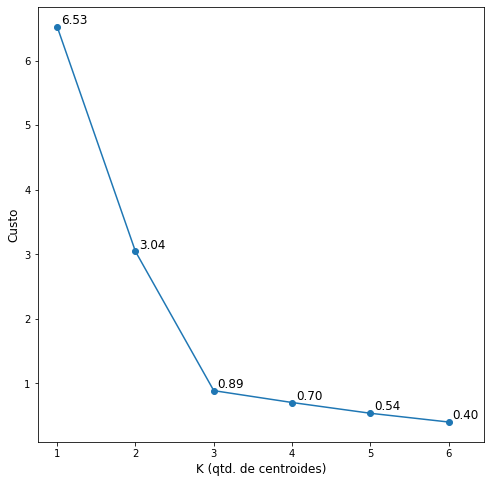

In [147]:
if __name__ == '__main__':
    #definindo o tamanho da figura 
    plt.figure(figsize=(8,8))

    plt.plot(valores_k, custos, marker='o')

    for i in range( len(custos) ):
        plt.annotate('%1.2f' %custos[i],xy=(valores_k[i]+0.05,custos[i]+0.05), fontsize='large')

    xmin, xmax = plt.xlim()   # returna o xlim atual
    plt.xlim([xmin,xmax+0.2]) # seta o xlim 

    plt.xlabel('K (qtd. de centroides)', fontsize='large') 
    plt.ylabel('Custo', fontsize='large')  

    plt.show()

# Parte 4: Usando o $k$-Médias para agrupar os pixels de uma imagem

Nesta parte do trabalho, você irá usar o $k$-médias para compactar uma imagem, isto é, representá-la usando um número menor de cores. 

Cada pixel da imagem será uma amostra da nossa base de dados. Cada pixel será representado por três valores que variam entre 0 e 255. O primeiro valor representa a intensidade da cor vermelha; o segundo é a intensidade da cor verde; e o terceiro é a intensidade da cor azul (RGB). 

Usando o método $k$-médias, iremos encontrar os agrupamentos das cores dos pixels. Depois, o valor de cada pixel será substituído pelo valor do centróide mais próximo. 

Primeiro, vamos importar a imagem e exibí-la. 

In [148]:
if __name__ == '__main__':
    import imageio # função para ler dados em formato de imagem

    A = imageio.imread(os.path.join(FILES_DIRECTORY, 'images', 'image1.png'))

    A = A / 255 # divide por 255 para que todos os valores fiquem entre 0 e 1

    print('Dimensão inicial: ',  A.shape) # dimensões da matriz de pixels

    # Muda a dimensão da matriz de imagens para Nx3 onde N = número de pixels.
    # Cada linha contém os valores de vermelho, verde e azul do pixel.
    # Esta será a base de dados que será agrupada pelo K-Médias.
    X = np.reshape(np.ravel(A), (A.shape[0]*A.shape[1], 3)) 
    print('\nNova dimensão: ',  X.shape)

    print('\nValores dos 5 primeiros pixels:')
    print(X[0:5,:])

Dimensão inicial:  (128, 128, 3)

Nova dimensão:  (16384, 3)

Valores dos 5 primeiros pixels:
[[0.61568627 0.64313725 0.60784314]
 [0.44313725 0.4745098  0.45490196]
 [0.41960784 0.45098039 0.45490196]
 [0.62745098 0.65882353 0.67843137]
 [0.29019608 0.32156863 0.34509804]]


C:\Users\Vinicius\AppData\Local\Temp\ipykernel_1448\863130532.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  A = imageio.imread(os.path.join(FILES_DIRECTORY, 'images', 'image1.png'))


Agora, vamos plotar os pixels da imagem.

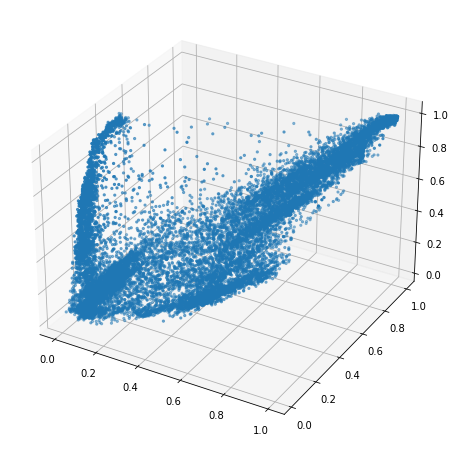

In [149]:
if __name__ == '__main__':
    # rotina que plota os pixels
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X[:,0], X[:,1], X[:,2], marker='.')

    plt.show()

Gere os centróides iniciais de maneira aleatória e inicialize os parâmetros.

In [150]:
if __name__ == '__main__':
    # tente diferentes valores de k e de max-iters
    K = 5 # quantidade de centróides
    max_iters = 10 # quantidade de iterações

    # inicializa os centroides aleatoriamente
    initial_centroids = kMeansInitCentroids(X, K)

    # executa o K-medias
    centroids, idx, dist = executa_kmedias(X, initial_centroids, max_iters, False)

K-Médias - Iteração 1/10
K-Médias - Iteração 2/10
K-Médias - Iteração 3/10
K-Médias - Iteração 4/10
K-Médias - Iteração 5/10
K-Médias - Iteração 6/10
K-Médias - Iteração 7/10
K-Médias - Iteração 8/10
K-Médias - Iteração 9/10
K-Médias - Iteração 10/10


## Parte 5: Comprimindo a imagem

Nesta parte do exercício, você usará os agrupamentos do $k$-médias para comprimir uma imagem. Para isso, nós iremos primeiramente encontrar os centróides mais próximos de cada pixel. Depois, vamos substituir cada pixel pelo centróide mais próximo.  

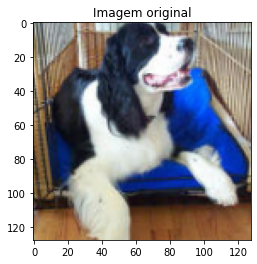

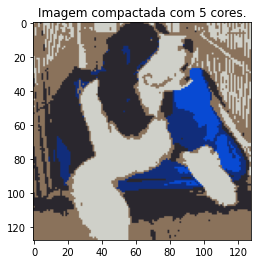

In [151]:
if __name__ == '__main__':
    # Agora vamos mapear amostra da base de dados (pixel) por seu centróide mais próximo.
    X_recovered = centroids[idx,:]

    # Vamos restaurar as dimensões originais da matriz de pixels
    X_recovered = np.reshape( np.ravel(X_recovered), (A.shape[0], A.shape[1], 3) )

    # Vamos plotar a imagem original
    import matplotlib.pyplot as plt
    plt.imshow(A); 
    plt.title('Imagem original')
    plt.show()

    # Vamos plotar a imagem compactada
    plt.imshow(X_recovered)
    plt.title('Imagem compactada com %d cores.' %K);
    plt.show()

# Parte 6: Comprimindo os frames de um vídeo

Nesta parte do trabalho, o K-médias será usado para compactar os frames do vídeo abaixo, usando um número menor de cores. 

In [152]:
if __name__ == '__main__':
    from IPython.display import HTML
    from base64 import b64encode

    def showVideo(path):

        mp4 = open(path,'rb').read()
        data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

        HTMLstring = """
            <video width=400 controls>
              <source src="%s" type="video/mp4">
            </video>""" % data_url

        display( HTML(HTMLstring) )

    showVideo(os.path.join(FILES_DIRECTORY, 'videos', 'sample6.mp4'))

O K-médias será aplicado separadamente em cada frame. Depois disso, os frames do vídeo serão usados para formar um novo vídeo compactado em relação ao número de cores. 

Para que os scripts abaixo funcionem, é necessário instalar  a biblioteca `imageio-ffmpeg`. Isso pode ser feitos usando um dos seguintes comandos:

 - `pip install imageio-ffmpeg`
 - `conda install -c conda-forge imageio-ffmpeg`]
 
 No script abaixo, faremos a instalação da biblioteca **imageio-ffmpeg**.

In [153]:
if __name__ == '__main__':
    # instala um pacote conda 
    import sys
    #!conda install --yes --prefix {sys.prefix} -c conda-forge imageio-ffmpeg

    !{sys.executable} -m pip install imageio-ffmpeg

^C


You should consider upgrading via the 'C:\Users\Vinicius\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Agora, vamos extrair todos os frames do vídeo.

In [ ]:
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    import imageio

    filename = os.path.join(FILES_DIRECTORY, "videos", "sample6.mp4")

    vid = imageio.get_reader(filename,  'ffmpeg')

    metadata = vid.get_meta_data()
    print('\nMetadados do video: ')
    print(metadata)

    frames = []
    for ff in vid.iter_data():

        frames.append(ff)

    print('\nQuantidade de frames: %d' %len(frames))

    print('\nDimensão de cada frame: ',  frames[0].shape)


Metadados do video: 
{'plugin': 'ffmpeg', 'nframes': inf, 'ffmpeg_version': '4.2.2 built with gcc 9.2.1 (GCC) 20200122', 'codec': 'h264', 'pix_fmt': 'yuv420p', 'fps': 14.99, 'source_size': (256, 144), 'size': (256, 144), 'rotate': 0, 'duration': 2.67}

Quantidade de frames: 40

Dimensão de cada frame:  (144, 256, 3)


Vamos imprimir os 30 primeiros frames.

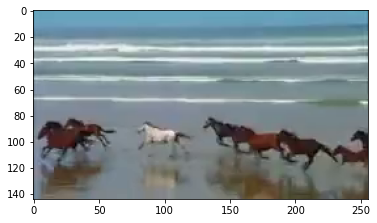

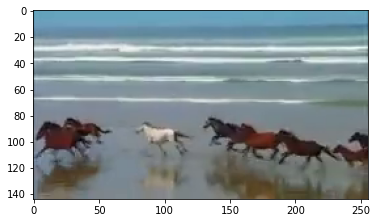

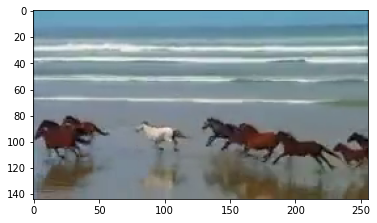

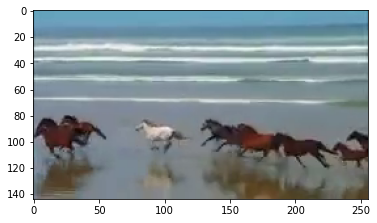

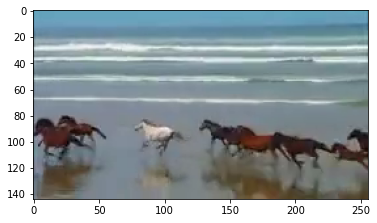

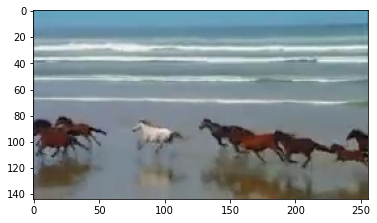

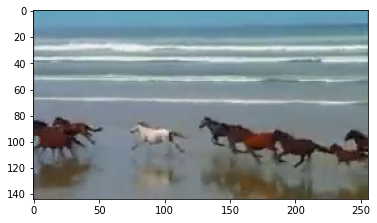

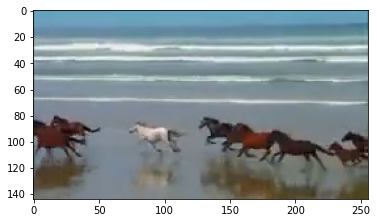

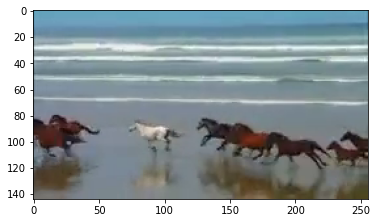

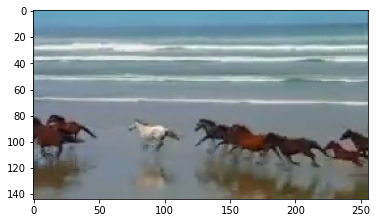

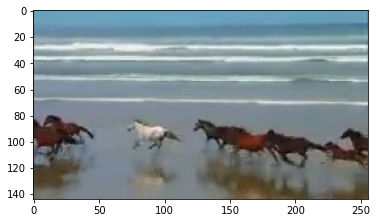

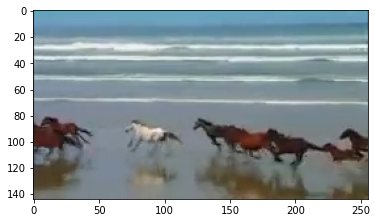

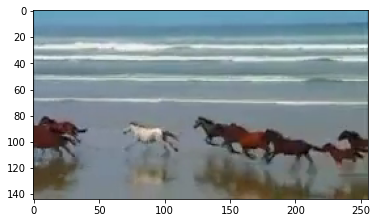

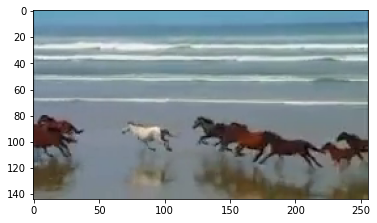

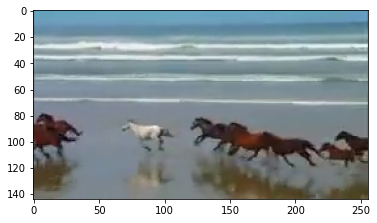

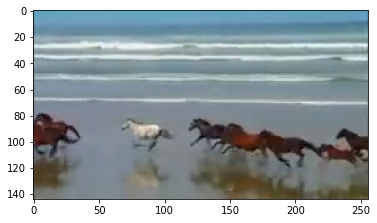

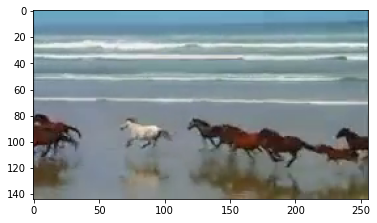

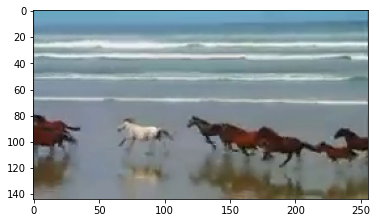

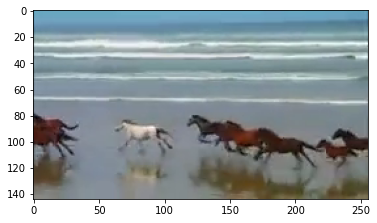

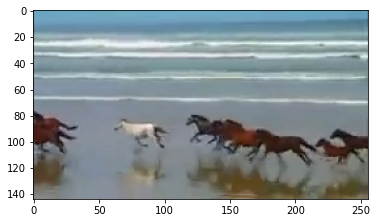

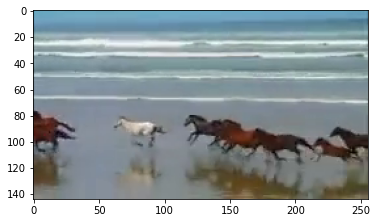

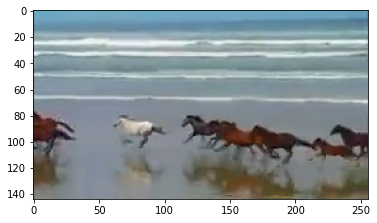

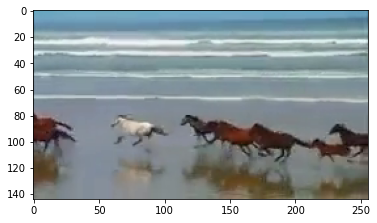

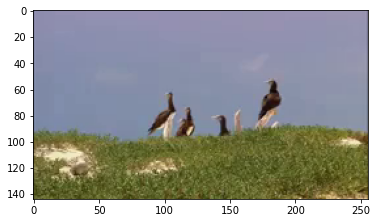

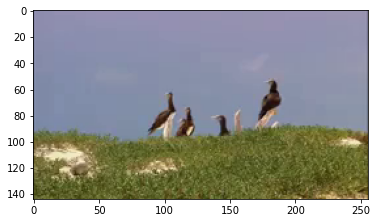

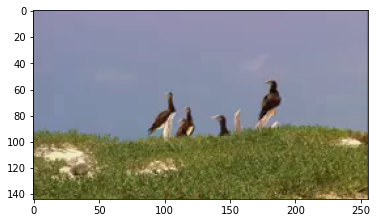

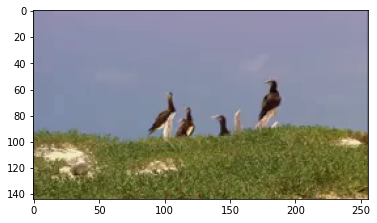

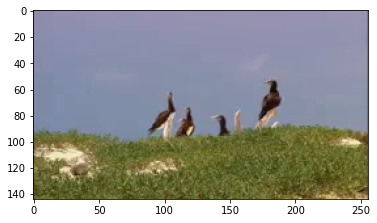

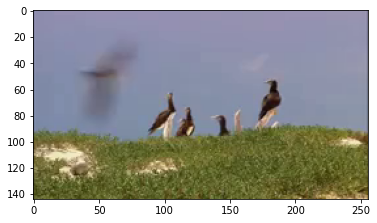

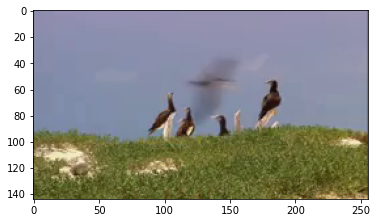

In [ ]:
if __name__ == '__main__':
    for i in range(30):

        plt.imshow(frames[i]); 

        plt.show()

Agora, vamos compactar os frames do vídeo usando o método K-médias que implementamos anteriormente.

In [ ]:
if __name__ == '__main__':
    newFrames = frames.copy()

    frames_recovered = []
    for i in range( len(frames) ):

        print('\n==============================================')
        print('Frame: %d' %(i+1))
        print('==============================================')

        newFrames[i] = newFrames[i]/255

        print('\nDimensão: ',  newFrames[i].shape)

        # Muda a dimensão da matriz de imagens para Nx3 onde N = número de pixels.
        # Cada linha contém os valores de vermelho, verde e azul do pixel.
        # Esta será a base de dados X que será usada no K-Médias.
        X = np.reshape(np.ravel(newFrames[i]), (newFrames[i].shape[0]*newFrames[i].shape[1], 3)) 

        print('\nNova dimensão: ',  X.shape)

        # tente diferentes valores de k e de max-iters
        K = 5 # quantidade de centróides
        max_iters = 5 # quantidade de iterações

        # inicializa os centroides aleatoriamente
        initial_centroids = kMeansInitCentroids(X, K)

        # executa o K-medias
        centroids, idx, dist = executa_kmedias(X, initial_centroids, max_iters, False)

        # Agora vamos mapear amostra da base de dados (pixel) por seu centróide mais próximo.
        X_recovered = centroids[idx,:] 

        # Vamos restaurar as dimensões originais da matriz de pixels
        X_recovered = np.reshape( np.ravel(X_recovered), (frames[i].shape[0], frames[i].shape[1], 3) )  

        frames_recovered.append(X_recovered)

        # Vamos plotar a imagem compactada
        plt.imshow(X_recovered)
        plt.title('Imagem compactada com %d cores.' %K);
        plt.show()


Frame: 1

Dimensão:  (144, 256, 3)

Nova dimensão:  (36864, 3)
K-Médias - Iteração 1/5
K-Médias - Iteração 2/5
K-Médias - Iteração 3/5
K-Médias - Iteração 4/5
K-Médias - Iteração 5/5


KeyboardInterrupt: 

Vamos gerar um novo vídeo com os frames compactados e salvá-lo em um arquivo.

In [ ]:
if __name__ == '__main__':
    import imageio

    writer = imageio.get_writer(os.path.join(FILES_DIRECTORY, 'videos', 'sample_kmedias.mp4'), fps=vid.get_meta_data()['fps'])

    for i in range( len(frames_recovered) ):

        frames_recovered[i] = np.nan_to_num(frames_recovered[i]) 

        writer.append_data( np.uint8(frames_recovered[i]*255) ); 

    writer.close()

Vamos ver o vídeo original e o compactado.

In [ ]:
if __name__ == '__main__':
    print('Video original')
    showVideo(os.path.join(FILES_DIRECTORY, 'videos', 'sample6.mp4'))

    print('Video com os frames compactados')
    showVideo(os.path.join(FILES_DIRECTORY, 'videos', 'sample_kmedias.mp4'))    

Video original


Video com os frames compactados
